**Chapter 2 – End-to-end Machine Learning project**

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

# Get the data

In [ ]:
import pandas as pd

def load_housing_data(filename):
    csv_path = filename
    return pd.read_csv(csv_path)

# linking colab and our drive folders

In [ ]:
%pwd
%ls

sample_data/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pwd
%ls

drive/  sample_data/


In [ ]:
%cd drive/MyDrive/
%ls

/content/drive/MyDrive
'Colab Notebooks'/   MLA-OE/  'my work'/  'TIER 2022'/  'TIER 2022- materials'/


In [ ]:
%cd MLA-OE/2022-23-odd-MLA-OE/code/mine/
%ls

/content/drive/MyDrive/MLA-OE/2022-23-odd-MLA-OE/code/mine
'1-ML project.ipynb'                           housing.csv
 1.oy                                          housing.tgz
 1.py                                          housing.xlsx
 2-data-reading---not.ipynb                    iris.csv
'2-pandas working-full.ipynb'                  iris.data
'2-pandas working.ipynb'                       iris.names
'3-matplotlib working.ipynb'                   iris.xlsx
'3-understanding data---not.ipynb'             pima-indians-diabetes1.csv
 4_end_to_end_machine_learning_project.ipynb   pima-indians-diabetes.csv
 data-read.py                                  README.md
 housepriceprediction.ipynb                    Untitled.ipynb
 housepriceprediction-lms.ipynb


In [ ]:
%ls


sample_data/


# upload data in content folder (default folder)

In [ ]:
housing = load_housing_data('housing.csv')
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [ ]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
housing.shape

(20640, 10)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.isnull().sum() # number of missing values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
housing["ocean_proximity"] # this is a regression problem.This field is not the output label

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [ ]:
housing["ocean_proximity"].value_counts() # count of unique labels

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
a=housing[housing["ocean_proximity"]=="NEAR BAY"]
print(a)
print((housing["ocean_proximity"]=="NEAR BAY").sum())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
19067    -122.45     38.28                20.0       3306.0           503.0   
19068    -122.47     38.29                14.0       3732.0           846.0   
19069    -122.45     38.27                25.0       5024.0           881.0   
19077    -122.49     38.27                 8.0       5092.0           988.0   
19104    -122.51     38.17                 8.0       5875.0          1115.0   

       population  households  median_income  media

In [ ]:
a['ocean_proximity'].value_counts()

NEAR BAY    2290
Name: ocean_proximity, dtype: int64

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object') (20640, 10)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
2    -122.24     37.85                52.0       1467.0           190.0   
5    -122.25     37.85                52.0        919.0           213.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  


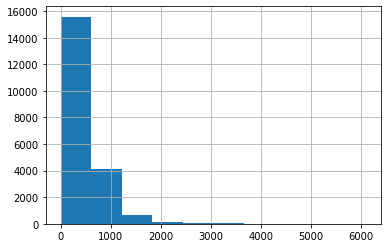

In [ ]:
housing['households'].hist()
print(housing.columns, housing.shape)
print((housing[housing['population']<500]).head(3))

In [ ]:
print(max(housing.households),"--------",min(housing.households))

6082.0 -------- 1.0


In [ ]:

housing['total_rooms']

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20640, dtype: float64

In [ ]:
housing.loc[3]

longitude              -122.25
latitude                 37.85
housing_median_age          52
total_rooms               1274
total_bedrooms             235
population                 558
households                 219
median_income           5.6431
median_house_value      341300
ocean_proximity       NEAR BAY
Name: 3, dtype: object

In [ ]:
housing.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


In [ ]:
housing[housing["ocean_proximity"]=="INLAND"] # conditional fetching of rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
954,-121.92,37.64,46.0,1280.0,209.0,512.0,208.0,5.1406,315600.0,INLAND
957,-121.90,37.66,18.0,7397.0,1137.0,3126.0,1115.0,6.4994,323000.0,INLAND
965,-121.88,37.68,23.0,2234.0,270.0,854.0,286.0,7.3330,337200.0,INLAND
967,-121.88,37.67,16.0,4070.0,624.0,1543.0,577.0,6.5214,311500.0,INLAND
968,-121.88,37.67,25.0,2244.0,301.0,937.0,324.0,6.4524,296900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
housing[housing["ocean_proximity"]=="<1H OCEAN"]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20502,-118.68,34.33,45.0,121.0,25.0,67.0,27.0,2.9821,325000.0,<1H OCEAN
20503,-118.75,34.33,27.0,534.0,85.0,243.0,77.0,8.2787,330000.0,<1H OCEAN
20504,-118.73,34.29,11.0,5451.0,736.0,2526.0,752.0,7.3550,343900.0,<1H OCEAN
20505,-118.72,34.29,22.0,3266.0,529.0,1595.0,494.0,6.0368,248000.0,<1H OCEAN


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates
the value below which a given percentage of observations in a group of observations
falls. For example, 25% of the districts have a housing_median_age lower than 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the
25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10dbf46950>,
      dtype=object)

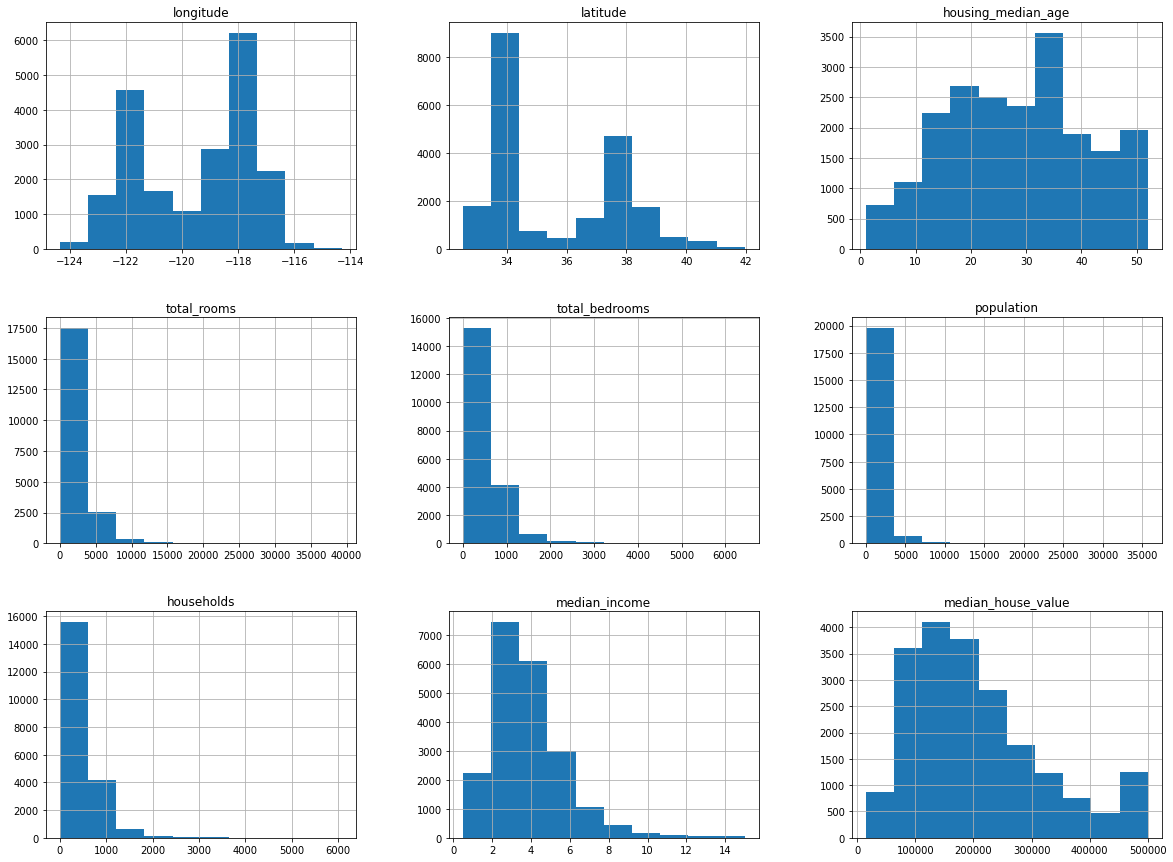

In [ ]:

housing.hist(figsize=(20,15))


In [ ]:
# to make this notebook's output identical at every run
np.random.seed(42)

# Splitting data

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2,random_state=42)

In [ ]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [ ]:
print(train_set.shape, test_set.shape)

(16512, 10) (4128, 10)


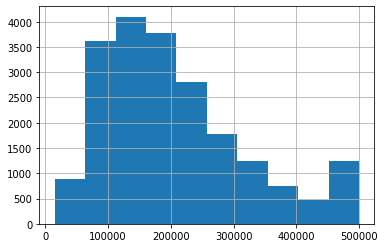

In [ ]:
# stratified sampling
housing["median_house_value"].hist()

In [ ]:
housing["median_house_value"].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: median_house_value, Length: 3842, dtype: int64

In [ ]:
print(housing["median_house_value"],"\nmax= ",max(housing["median_house_value"]), "\n min=",min(housing["median_house_value"]))

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64 
max=  500001.0 
 min= 14999.0


#train test split for classification ----- Balanced Split

In [ ]:
import pandas as pd
data=pd.read_csv("iris.data",header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


##### separate input and output

In [ ]:

y=data[4]
X=data.drop([4],axis=1)

In [ ]:
X

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train.shape,X_test.shape)

(120, 4) (30, 4)


In [ ]:
print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: 4, dtype: int64
Iris-virginica     41
Iris-versicolor    40
Iris-setosa        39
Name: 4, dtype: int64
Iris-setosa        11
Iris-versicolor    10
Iris-virginica      9
Name: 4, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [ ]:
print(X_train.shape,X_test.shape)

(120, 4) (30, 4)


In [ ]:
print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: 4, dtype: int64
Iris-versicolor    40
Iris-setosa        40
Iris-virginica     40
Name: 4, dtype: int64
Iris-setosa        10
Iris-versicolor    10
Iris-virginica     10
Name: 4, dtype: int64


# Housing ----- Discover and visualize the data to gain insights

In [ ]:
housing = load_housing_data('housing.csv')
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [ ]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
housing = train_set.copy()

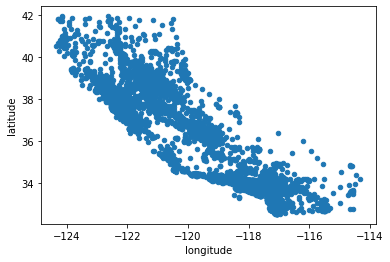

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")


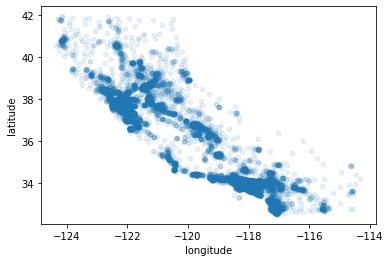

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


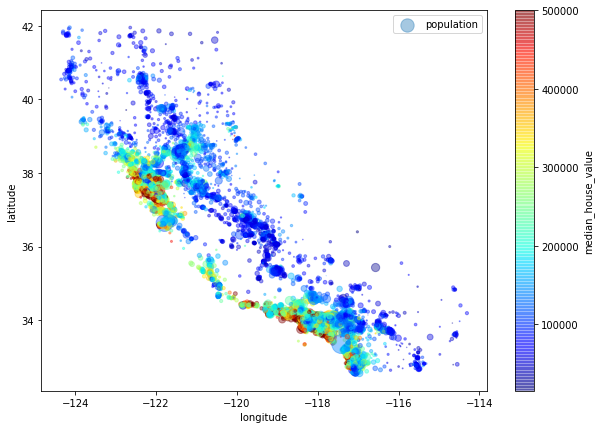

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()


The radius of each circle represents
the district’s population (option s), and the color represents the price (option c). We
will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices)

This image tells you that the housing prices are very much related to the location
(e.g., close to the ocean) and to the population density, as you probably knew already.
It will probably be useful to use a clustering algorithm to detect the main clusters, and
add new features that measure the proximity to the cluster centers.


In [ ]:
corr_matrix = housing.corr() #pearson correlation coefficient

In [ ]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [ ]:
housing.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [ ]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,6.268421,0.180940,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN,6.129032,0.151128,3.032258
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND,6.868597,0.184825,3.904232
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN,3.986717,0.270823,3.332068
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN,6.395349,0.166993,3.178891


# Prepare the data for Machine Learning algorithms

In [ ]:
import pandas as pd
housing = pd.read_csv('housing.csv')
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing, test_size=0.2, random_state=2)

In [ ]:
print(train_set,test_set)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2072     -119.84     36.77                 6.0       1853.0           473.0   
10600    -117.80     33.68                 8.0       2032.0           349.0   
2494     -120.19     36.60                25.0        875.0           214.0   
4284     -118.32     34.10                31.0        622.0           229.0   
16541    -121.23     37.79                21.0       1922.0           373.0   
...          ...       ...                 ...          ...             ...   
1099     -121.90     39.59                20.0       1465.0           278.0   
18898    -122.25     38.11                49.0       2365.0           504.0   
11798    -121.22     38.92                19.0       2531.0           461.0   
6637     -118.14     34.16                39.0       2776.0           840.0   
2575     -124.13     40.80                31.0       2152.0           462.0   

       population  households  median_income  media

In [ ]:
housing = train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = train_set["median_house_value"].copy()

In [ ]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)]
sample_incomplete_rows.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5723,-118.23,34.18,45.0,2332.0,NaN,943.0,339.0,8.1132,<1H OCEAN
2578,-124.06,40.86,34.0,4183.0,NaN,1891.0,669.0,3.2216,NEAR OCEAN
10033,-121.08,39.22,30.0,2188.0,NaN,1033.0,437.0,2.1419,INLAND
19485,-120.98,37.66,10.0,934.0,NaN,401.0,255.0,0.9336,INLAND
19766,-122.10,40.03,25.0,2516.0,NaN,1266.0,494.0,1.7566,INLAND


In [ ]:
sample_incomplete_rows.shape

(176, 9)

In [ ]:
sample_incomplete_rows=sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

In [ ]:
sample_incomplete_rows.shape

(0, 9)

In [ ]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [ ]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity


In [ ]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)]
print("\n-----------------------before ---------------\n",sample_incomplete_rows.head(2))
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
print("\n-----------------------after ---------------\n",sample_incomplete_rows.head(2))
print(sample_incomplete_rows.shape)


-----------------------before ---------------
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5723    -118.23     34.18                45.0       2332.0             NaN   
2578    -124.06     40.86                34.0       4183.0             NaN   

      population  households  median_income ocean_proximity  
5723       943.0       339.0         8.1132       <1H OCEAN  
2578      1891.0       669.0         3.2216      NEAR OCEAN  

-----------------------after ---------------
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5723    -118.23     34.18                45.0       2332.0           435.0   
2578    -124.06     40.86                34.0       4183.0           435.0   

      population  households  median_income ocean_proximity  
5723       943.0       339.0         8.1132       <1H OCEAN  
2578      1891.0       669.0         3.2216      NEAR OCEAN  
(176, 9)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


#### Fill missing values with median

In [ ]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [ ]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median,inplace=True)

In [ ]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

#### Filling missing values using Imputer

**Warning**: Since Scikit-Learn 0.20, the `sklearn.preprocessing.Imputer` class was replaced by the `sklearn.impute.SimpleImputer` class.

In [ ]:
from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
imputer = SimpleImputer(strategy="median")

In [ ]:
housing=pd.read_csv("housing.csv")

Remove the text attribute because median can only be calculated on numerical attributes:

In [ ]:
housing_num = housing.drop('ocean_proximity', axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [ ]:
housing_num.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

Check that this is the same as manually computing the median of each attribute:

In [ ]:
housing_num.median().values

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

Transform the training set:

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
X

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.5210e+05],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  9.2300e+04],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  8.4700e+04],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  8.9400e+04]])

In [ ]:
housing_num.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0


In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [ ]:
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
imputer.strategy

'median'

In [ ]:
housing_tr.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0


Now let's preprocess the categorical input feature, `ocean_proximity`: ----OrdinalEncoder

In [ ]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [ ]:
from sklearn.preprocessing import OrdinalEncoder


In [ ]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### Now let's preprocess the categorical input feature, `ocean_proximity`: ----OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

housing_cat = housing[['ocean_proximity']]
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [ ]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [ ]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Select and train a model 

In [ ]:
import pandas as pd
housing=pd.read_csv("housing.csv")

from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing, test_size=0.2, random_state=5)

##### fill missing values

In [ ]:


X_train = train_set.drop("median_house_value", axis=1) # drop labels for training set
X_train = X_train.drop("ocean_proximity", axis=1) # drop labels for training set
y_train = train_set["median_house_value"].copy()

print(X_train.isnull().sum())
median = X_train["total_bedrooms"].median()
X_train["total_bedrooms"].fillna(median, inplace=True) # option 3

X_train_copy=X_train


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        174
population              0
households              0
median_income           0
dtype: int64


###### Scaling - Normalization

In [ ]:
print(min(X_train["total_rooms"]),max(X_train["total_rooms"]))
print(min(X_train["median_income"]),max(X_train["median_income"]))

2.0 39320.0
0.4999 15.0001


In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()
X_train=std_scale.fit_transform(X_train)

In [ ]:
X_train

array([[ 5.76060498e-01, -7.70975872e-01,  5.10763438e-01, ...,
        -8.60795815e-04, -1.76140232e-02, -7.56688224e-02],
       [-1.40634288e+00,  9.94044691e-01,  1.86202910e+00, ...,
        -3.37279287e-01, -6.47968406e-02,  3.37726079e-01],
       [ 7.20870820e-01, -7.56930616e-01,  5.90249653e-01, ...,
        -3.57588015e-01, -5.68080227e-01, -9.22898030e-01],
       ...,
       [ 4.11276338e-01, -6.39886812e-01, -6.81529790e-01, ...,
         1.76619825e-01, -1.90617687e-01,  1.02816493e+00],
       [-1.20161104e+00,  6.33549775e-01, -1.15844708e+00, ...,
         1.75451968e+00,  2.24453995e+00, -1.44876858e-01],
       [ 2.56479098e-01, -1.29575827e-01, -1.55587816e+00, ...,
        -9.00625736e-01, -7.56811496e-01,  2.54326954e-01]])

In [ ]:
X_train = pd.DataFrame(X_train, columns=X_train_copy.columns,
                          index=X_train_copy.index)
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5500,0.576060,-0.770976,0.510763,-0.429370,-0.133859,-0.000861,-0.017614,-0.075669
15860,-1.406343,0.994045,1.862029,-0.148712,-0.167327,-0.337279,-0.064797,0.337726
7232,0.720871,-0.756931,0.590250,-0.756576,-0.628710,-0.357588,-0.568080,-0.922898
6115,0.835720,-0.710113,0.351791,-0.389667,-0.196014,0.316132,-0.366243,-0.638070
8828,0.606021,-0.724158,0.590250,-0.571296,-0.191233,-0.490036,-0.085767,-0.681332


In [ ]:
print(min(X_train["total_rooms"]),max(X_train["total_rooms"]))
print(min(X_train["median_income"]),max(X_train["median_income"]))

-1.204716266477457 16.738230392548427
-1.7834181448188273 5.894702448397047


#### model building

In [ ]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5500,0.576060,-0.770976,0.510763,-0.429370,-0.133859,-0.000861,-0.017614,-0.075669
15860,-1.406343,0.994045,1.862029,-0.148712,-0.167327,-0.337279,-0.064797,0.337726
7232,0.720871,-0.756931,0.590250,-0.756576,-0.628710,-0.357588,-0.568080,-0.922898
6115,0.835720,-0.710113,0.351791,-0.389667,-0.196014,0.316132,-0.366243,-0.638070
8828,0.606021,-0.724158,0.590250,-0.571296,-0.191233,-0.490036,-0.085767,-0.681332
...,...,...,...,...,...,...,...,...
5520,0.591041,-0.780339,1.385112,-0.202562,-0.444635,-0.520941,-0.434396,1.434941
3046,0.146623,-0.064031,0.431277,-0.328059,-0.380089,-0.289598,-0.392455,-0.774951
20463,0.411276,-0.639887,-0.681530,0.389330,-0.212749,0.176620,-0.190618,1.028165
18638,-1.201611,0.633550,-1.158447,1.891649,2.189787,1.754520,2.244540,-0.144877


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# let's try the full preprocessing pipeline on a few training instances
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]

#print(some_data)
print("Predictions:", lin_reg.predict(some_data))
print("Actual ", list(some_labels))

Predictions: [230332.5945113  297741.02307824 141121.91633929 129858.24053851
 199348.33133136]
Actual  [284600.0, 321600.0, 153500.0, 124100.0, 200000.0]


Compare against the actual values:

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_predictions)
lin_rmse = np.sqrt(lin_mse)
print("training error RMSE ",lin_rmse)

training error RMSE  69517.9257280493


In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, y_predictions)
print("training error MAE ",lin_mae)

training error MAE  50672.74270149635


#Evaluate for test set

In [ ]:
test_set.shape

(4128, 10)

In [ ]:
X_test=test_set.drop(["ocean_proximity","median_house_value"],axis=1)
X_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [ ]:
y_test=test_set["median_house_value"]

In [ ]:
y_pred=lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print("testing error RMSE ",lin_rmse)
lin_mae = mean_absolute_error(y_test, y_pred)
print("testing error MAE ",lin_mae)

ValueError: ignored

In [ ]:
X_test.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        33
population             0
households             0
median_income          0
dtype: int64

In [ ]:
median = X_test["total_bedrooms"].median()
X_test["total_bedrooms"].fillna(median, inplace=True) # option 3

from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()
X_test=std_scale.fit_transform(X_test)


y_pred=lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print("testing error RMSE ",lin_rmse)
lin_mae = mean_absolute_error(y_test, y_pred)
print("testing error MAE ",lin_mae)


testing error RMSE  70294.90086950426
testing error MAE  51611.578015704836


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# Decision tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)

print("testing error RMSE ",tree_rmse)
tree_mae = mean_absolute_error(y_test, y_pred)
print("testing error MAE ",tree_mae)

testing error RMSE  72835.94268525703
testing error MAE  47858.52640503876


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


# Fine-tune your model

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [67883.00931956 69275.35568126 66022.43011224 71425.02161914
 69490.92891952 71727.56450315 67751.95927074 68275.96488889
 65802.41766812 68952.6892179 ]
Mean: 68660.73412004966
Standard deviation: 1868.3776586746662


In [ ]:
lin_scores = cross_val_score(lin_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [73493.24646445 68607.92423841 67245.67615841 70407.76702479
 68211.60991893 71373.39549425 66281.44939844 72310.4259503
 67683.77254044 71065.16640219]
Mean: 69668.04335906048
Standard deviation: 2270.2642459907847


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train, y_train)

In [ ]:
y_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_predictions)
forest_rmse = np.sqrt(forest_mse)

forest_mae=mean_absolute_error(y_test,y_predictions)
print(forest_rmse,forest_mae)



In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

 # Fine tune the model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

In [ ]:
from sklearn.model_selection import GridSearchCV
'''
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

  {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }
'''
param_grid = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }


tree_reg = DecisionTreeRegressor()#random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)

print(grid_search.get_params().keys())

grid_search.fit(X_train, y_train)

dict_keys(['cv', 'error_score', 'estimator__ccp_alpha', 'estimator__criterion', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__random_state', 'estimator__splitter', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
112000 fits failed out of a total of 252000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
112000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fra

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

Let's look at the score of each hyperparameter combination tested during the grid search:

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

## Model persistence using joblib

In [ ]:
#from sklearn.externals import joblib # deprecated, use import joblib instead
import joblib

joblib.dump(lin_reg, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF